In [14]:
import geopandas as gpd
import pandas as pd
import numpy as np


In [15]:
alabama_places= gpd.read_file(r"C:\Users\agmon\Documents\408-HW2\cb_2024_01_place_500k")

In [16]:
alabama_places

,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,32704,02403782,1600000US0132704,0132704,Haleyville,Haleyville city,AL,Alabama,25,21713018,130983,"MULTIPOLYGON (((-87.60417 34.24614, -87.60201 ..."
1,01,45472,02406131,1600000US0145472,0145472,McIntosh,McIntosh town,AL,Alabama,43,2579767,0,"POLYGON ((-88.03726 31.27171, -88.03112 31.271..."
2,01,53784,02406982,1600000US0153784,0153784,Newbern,Newbern town,AL,Alabama,43,3010370,6872,"POLYGON ((-87.54125 32.60104, -87.52531 32.601..."
3,01,78204,02405634,1600000US0178204,0178204,Valley,Valley city,AL,Alabama,25,33384157,0,"MULTIPOLYGON (((-85.17006 32.7799, -85.17005 3..."
4,01,02836,02405172,1600000US0102836,0102836,Ashford,Ashford city,AL,Alabama,25,16064130,56699,"POLYGON ((-85.25721 31.17963, -85.25643 31.204..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,01,63984,02407191,1600000US0163984,0163984,Reece City,Reece City town,AL,Alabama,43,9226254,0,"POLYGON ((-86.06752 34.04462, -86.0667 34.0452..."
590,01,29296,02406555,1600000US0129296,0129296,Gaylesville,Gaylesville town,AL,Alabama,43,3593015,94834,"POLYGON ((-85.58281 34.2614, -85.58111 34.2593..."
591,01,44536,02406051,1600000US0144536,0144536,Lowndesboro,Lowndesboro town,AL,Alabama,43,2050742,0,"POLYGON ((-86.62132 32.27615, -86.61304 32.276..."
592,01,55440,02407012,1600000US0155440,0155440,Notasulga,Notasulga town,AL,Alabama,43,36173002,398501,"POLYGON ((-85.7041 32.58211, -85.69565 32.5820..."


In [18]:
alabama_places_reproj=alabama_places.to_crs(epsg=3857)

In [35]:
alabama_places_reproj

,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,32704,02403782,1600000US0132704,0132704,Haleyville,Haleyville city,AL,Alabama,25,21713018,130983,"MULTIPOLYGON (((-9752051.756 4061900.215, -975..."
1,01,45472,02406131,1600000US0145472,0145472,McIntosh,McIntosh town,AL,Alabama,43,2579767,0,"POLYGON ((-9800263.309 3668085.982, -9799579.5..."
2,01,53784,02406982,1600000US0153784,0153784,Newbern,Newbern town,AL,Alabama,43,3010370,6872,"POLYGON ((-9745047.406 3842467.085, -9743273.2..."
3,01,78204,02405634,1600000US0178204,0178204,Valley,Valley city,AL,Alabama,25,33384157,0,"MULTIPOLYGON (((-9481087.791 3866125.107, -948..."
4,01,02836,02405172,1600000US0102836,0102836,Ashford,Ashford city,AL,Alabama,25,16064130,56699,"POLYGON ((-9490788.794 3656099.33, -9490702.51..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,01,63984,02407191,1600000US0163984,0163984,Reece City,Reece City town,AL,Alabama,43,9226254,0,"POLYGON ((-9580992.001 4034794.497, -9580901.1..."
590,01,29296,02406555,1600000US0129296,0129296,Gaylesville,Gaylesville town,AL,Alabama,43,3593015,94834,"POLYGON ((-9527034.877 4063955.315, -9526845.7..."
591,01,44536,02406051,1600000US0144536,0144536,Lowndesboro,Lowndesboro town,AL,Alabama,43,2050742,0,"POLYGON ((-9642640.838 3799613.551, -9641719.2..."
592,01,55440,02407012,1600000US0155440,0155440,Notasulga,Notasulga town,AL,Alabama,43,36173002,398501,"POLYGON ((-9540536.334 3839965.826, -9539596.5..."


383    POLYGON ((-9564428.838 3654591.193, -9564308.3...
Name: geometry, dtype: geometry


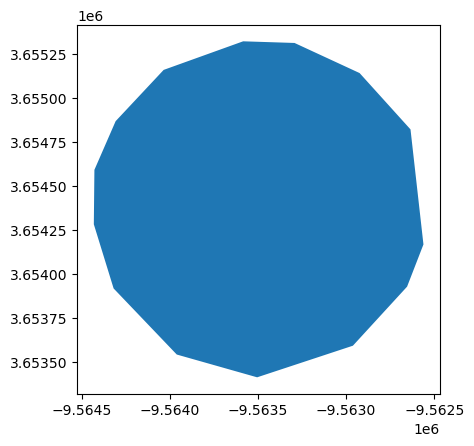

In [20]:
coffee_springs = alabama_places_reproj[alabama_places_reproj['NAME'] == 'Coffee Springs']

coffee_springs.plot()
print(coffee_springs['geometry'])

In [ ]:
for index, row in alabama_places_reproj.iterrows():
    name= row ['NAME']
    

In [24]:
from shapely.geometry import Polygon
import math

def is_circle( polygon, tolerance= 0.9):
    if not isinstance(polygon, Polygon):
        return False
    area = polygon.area
    perimeter = polygon = polygon.length
    if perimeter == 0:
        return False
    circle_area = (perimeter ** 2) / (4 * math.pi)
    if circle_area == 0:
        return False
    circle_ratio = area / circle_area
    return circle_ratio >= tolerance

Citys or Towns with Circular or near circular geometry:
Oakman
Goldville
Coffee Springs
Brantley


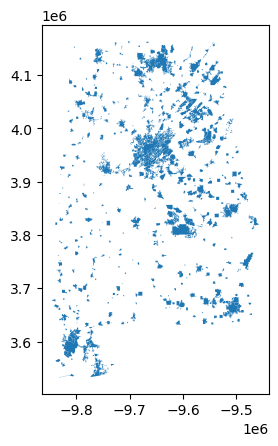

In [31]:
circle_polygons = gpd.GeoDataFrame(columns= alabama_places_reproj.columns, geometry='geometry')

print("Citys or Towns with Circular or near circular geometry:")
for index, row in alabama_places_reproj.iterrows():
    if is_circle(row['geometry']):
        print(row['NAME'])
    circle_polygons = pd.concat([circle_polygons, gpd.GeoDataFrame([row])], ignore_index=True)   
if not circle_polygons.empty:
    circle_polygons.plot()
else:
    print("No circlular polygons")


386    POLYGON ((-9603983.04 3708770.949, -9603847.78...
Name: geometry, dtype: geometry


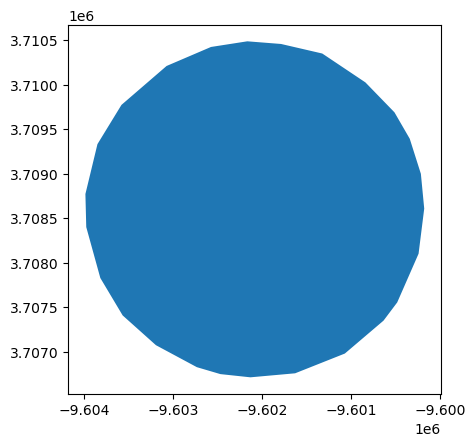

In [34]:
Brantley= alabama_places_reproj[alabama_places_reproj['NAME'] == 'Brantley']

Brantley.plot()
print(Brantley['geometry'])

289    POLYGON ((-9550415.006 3906372.487, -9550331.1...
Name: geometry, dtype: geometry


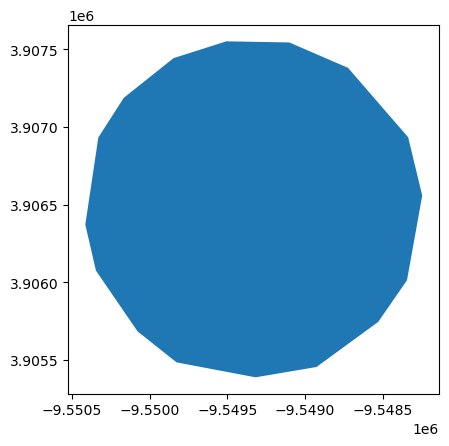

In [33]:
Goldville= alabama_places_reproj[alabama_places_reproj['NAME'] == 'Goldville']

Goldville.plot()
print(Goldville['geometry'])

256    POLYGON ((-9730013.197 3990557.704, -9729903.8...
Name: geometry, dtype: geometry


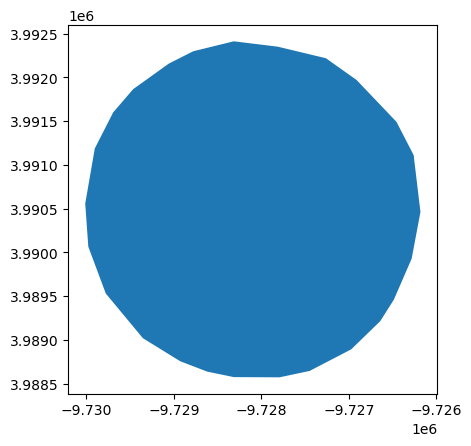

In [32]:
Oakman= alabama_places_reproj[alabama_places_reproj['NAME'] == 'Oakman']

Oakman.plot()
print(Oakman['geometry'])